In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 50)
import requests
import json
import time
import random

In [4]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [5]:
compiled_list = []
for n in tqdm(list(range(1,399))):
        url='https://api.themoviedb.org/3/movie/top_rated?api_key=0e72c0b2b11293a6390e9f7b472aec2b&language=en-US&page={}'.format(n)
        r = requests.get(url)
        data = r.json()
        compiled_list.append(data)
        time.sleep(random.choice([1,2]))

ipykernel_launcher:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [9]:
compiled_list[0]

s': [18, 80],
   'title': 'The Godfather',
   'vote_average': 8.7,
   'overview': 'Spanning the years 1945 to 1955, a chronicle of the fictional Italian-American Corleone crime family. When organized crime family patriarch, Vito Corleone barely survives an attempt on his life, his youngest son, Michael steps in to take care of the would-be killers, launching a campaign of bloody revenge.',
   'release_date': '1972-03-14'},
  {'popularity': 31.831,
   'id': 424,
   'video': False,
   'vote_count': 10530,
   'vote_average': 8.6,
   'title': "Schindler's List",
   'release_date': '1993-11-30',
   'original_language': 'en',
   'original_title': "Schindler's List",
   'genre_ids': [18, 36, 10752],
   'backdrop_path': '/loRmRzQXZeqG78TqZuyvSlEQfZb.jpg',
   'adult': False,
   'overview': 'The true story of how businessman Oskar Schindler saved over a thousand Jewish lives from the Nazis while they worked as slaves in his factory during World War II.',
   'poster_path': '/c8Ass7acuOe4za6DhSatt

In [10]:
movies = []
for page in compiled_list:
    movies += page['results']
    
movies[0]

{'popularity': 13.381,
 'id': 724089,
 'video': False,
 'vote_count': 923,
 'vote_average': 8.9,
 'title': "Gabriel's Inferno Part II",
 'release_date': '2020-07-31',
 'original_language': 'en',
 'original_title': "Gabriel's Inferno Part II",
 'genre_ids': [10749],
 'backdrop_path': '/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg',
 'adult': False,
 'overview': "Professor Gabriel Emerson finally learns the truth about Julia Mitchell's identity, but his realization comes a moment too late. Julia is done waiting for the well-respected Dante specialist to remember her and wants nothing more to do with him. Can Gabriel win back her heart before she finds love in another's arms?",
 'poster_path': '/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg'}

In [11]:
df = pd.DataFrame(movies)

In [12]:
df['month'] = df['release_date'].apply(lambda m: m[5:7])

In [13]:
df['year'] = df['release_date'].apply(lambda m: m[0:4])

In [14]:
df.dtypes

popularity           float64
id                     int64
video                   bool
vote_count             int64
vote_average         float64
title                 object
release_date          object
original_language     object
original_title        object
genre_ids             object
backdrop_path         object
adult                   bool
overview              object
poster_path           object
month                 object
year                  object
dtype: object

In [15]:
df['year'] = df['year'].apply(lambda x: int(x))

In [16]:
df['month'] = df['month'].apply(lambda x: int(x))

In [17]:
#limit to movies after the 1970,s, but we can pick a different date range
df.loc[(df['year'] > 1970)]

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path,month,year
0,13.381,724089,False,923,8.9,Gabriel's Inferno Part II,2020-07-31,en,Gabriel's Inferno Part II,[10749],/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg,False,Professor Gabriel Emerson finally learns the t...,/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg,7,2020
1,11.889,696374,False,1537,8.8,Gabriel's Inferno,2020-05-29,en,Gabriel's Inferno,[10749],/969BfPHGJcjg2aUv60g5uiiXFzf.jpg,False,An intriguing and sinful exploration of seduct...,/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg,5,2020
2,20.264,644479,False,256,8.7,Dedicated to my ex,2019-11-01,es,Dedicada a mi ex,"[35, 18]",/8g1rUabKleLvovt0Sx6bXgWfC42.jpg,False,"The film tells the story of Ariel, a 21-year-o...",/riAooJrFvVhotyaOgoI0WR7okSe.jpg,11,2019
3,46.486,278,False,17488,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[18, 80]",/iNh3BivHyg5sQRPP1KOkzguEX0H.jpg,False,Framed in the 1940s for the double murder of h...,/5KCVkau1HEl7ZzfPsKAPM0sMiKc.jpg,9,1994
4,15.847,19404,False,2419,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,"[35, 18, 10749]",/svYzz6A6xleZv5toTLAhigXd1DX.jpg,False,"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,10,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7955,10.794,22345,False,226,3.8,Baby Geniuses,1999-03-12,en,Baby Geniuses,"[35, 878, 10751]",/ixEuNI782ChcUt203PESBHYnRxH.jpg,False,"Scientist hold talking, super-intelligent babi...",/x7rB8xIJda2EcORq4Z7p8DWMC9F.jpg,3,1999
7956,8.467,10870,False,228,3.8,Lucky Luke and the Daltons,2004-11-08,fr,Les Dalton,"[35, 37]",/ymKO6XO8MAeXToLHoduOjgVtuam.jpg,False,Joe and Averell are the eldest and youngest of...,/mWQR9eGbf9dTiceypaGKmVXzRVE.jpg,11,2004
7957,15.628,9760,False,974,3.8,Epic Movie,2007-01-25,en,Epic Movie,"[28, 12, 35]",/mSZog2CLzXBBItsWq3sPt6WH9rf.jpg,False,"When Edward, Peter, Lucy and Susan each follow...",/l0lGJiTzU2Ce6T31DIRWv7I0kaC.jpg,1,2007
7958,9.976,26914,False,253,3.7,Troll 2,1990-10-12,en,Troll 2,[27],/AsjEwOxebU1AF040QjfMkE8lskK.jpg,False,When young Joshua learns that he will be going...,/eFth6zw4PEInzr2Y64mYVN1zbBi.jpg,10,1990


In [18]:
df.dropna(subset = ['year', 'month'])

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path,month,year
0,13.381,724089,False,923,8.9,Gabriel's Inferno Part II,2020-07-31,en,Gabriel's Inferno Part II,[10749],/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg,False,Professor Gabriel Emerson finally learns the t...,/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg,7,2020
1,11.889,696374,False,1537,8.8,Gabriel's Inferno,2020-05-29,en,Gabriel's Inferno,[10749],/969BfPHGJcjg2aUv60g5uiiXFzf.jpg,False,An intriguing and sinful exploration of seduct...,/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg,5,2020
2,20.264,644479,False,256,8.7,Dedicated to my ex,2019-11-01,es,Dedicada a mi ex,"[35, 18]",/8g1rUabKleLvovt0Sx6bXgWfC42.jpg,False,"The film tells the story of Ariel, a 21-year-o...",/riAooJrFvVhotyaOgoI0WR7okSe.jpg,11,2019
3,46.486,278,False,17488,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[18, 80]",/iNh3BivHyg5sQRPP1KOkzguEX0H.jpg,False,Framed in the 1940s for the double murder of h...,/5KCVkau1HEl7ZzfPsKAPM0sMiKc.jpg,9,1994
4,15.847,19404,False,2419,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,"[35, 18, 10749]",/svYzz6A6xleZv5toTLAhigXd1DX.jpg,False,"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,10,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7955,10.794,22345,False,226,3.8,Baby Geniuses,1999-03-12,en,Baby Geniuses,"[35, 878, 10751]",/ixEuNI782ChcUt203PESBHYnRxH.jpg,False,"Scientist hold talking, super-intelligent babi...",/x7rB8xIJda2EcORq4Z7p8DWMC9F.jpg,3,1999
7956,8.467,10870,False,228,3.8,Lucky Luke and the Daltons,2004-11-08,fr,Les Dalton,"[35, 37]",/ymKO6XO8MAeXToLHoduOjgVtuam.jpg,False,Joe and Averell are the eldest and youngest of...,/mWQR9eGbf9dTiceypaGKmVXzRVE.jpg,11,2004
7957,15.628,9760,False,974,3.8,Epic Movie,2007-01-25,en,Epic Movie,"[28, 12, 35]",/mSZog2CLzXBBItsWq3sPt6WH9rf.jpg,False,"When Edward, Peter, Lucy and Susan each follow...",/l0lGJiTzU2Ce6T31DIRWv7I0kaC.jpg,1,2007
7958,9.976,26914,False,253,3.7,Troll 2,1990-10-12,en,Troll 2,[27],/AsjEwOxebU1AF040QjfMkE8lskK.jpg,False,When young Joshua learns that he will be going...,/eFth6zw4PEInzr2Y64mYVN1zbBi.jpg,10,1990


In [19]:
month = set(df['month'])
month

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [20]:
df.groupby(['month'])['vote_average'].mean()

month
1     6.432353
2     6.484694
3     6.532198
4     6.426025
5     6.681575
6     6.592200
7     6.515141
8     6.504993
9     6.636618
10    6.598545
11    6.688127
12    6.715263
Name: vote_average, dtype: float64

In [21]:
df.groupby(['month']).mean()

,popularity,id,video,vote_count,vote_average,adult,year
month,,,,,,,
1,19.293951,139927.211765,False,1010.364706,6.432353,False,2005.003922
2,19.541446,123628.437075,False,1298.051020,6.484694,False,2003.365646
3,19.952862,122002.721362,False,1374.414861,6.532198,False,2003.371517
4,18.800684,125139.436720,False,1360.140820,6.426025,False,2002.720143
5,21.115551,128978.867672,False,1927.043551,6.681575,False,2002.673367
6,23.159181,111175.209048,False,1987.848674,6.592200,False,2000.566303
7,25.785997,120932.963394,False,1813.973378,6.515141,False,2002.836938
8,24.837410,132170.199706,False,1126.044053,6.504993,False,2003.218796
9,20.755106,138606.061590,False,1166.879059,6.636618,False,2005.904815


In [22]:
popular = df.groupby(['month']).mean().loc[:,['popularity', 'vote_count', 'vote_average']]
popular

,popularity,vote_count,vote_average
month,,,
1,19.293951,1010.364706,6.432353
2,19.541446,1298.051020,6.484694
3,19.952862,1374.414861,6.532198
4,18.800684,1360.140820,6.426025
5,21.115551,1927.043551,6.681575
6,23.159181,1987.848674,6.592200
7,25.785997,1813.973378,6.515141
8,24.837410,1126.044053,6.504993
9,20.755106,1166.879059,6.636618


<BarContainer object of 12 artists>

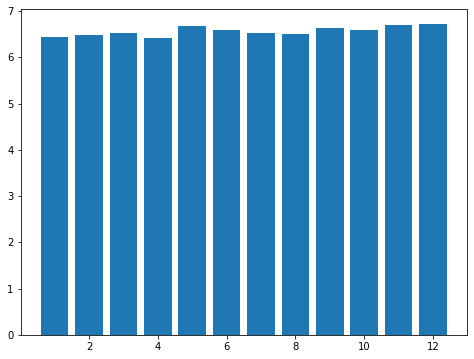

In [23]:
vote = df.groupby(['month'])['vote_average'].mean()
x = vote.index
y = vote.values

fig, ax = plt.subplots(figsize = (8,6))
# plt.bar(x,y)
ax.bar(x,y)